# Вложенные запросы

Все запросы в данном уроке будут формулироваться для таблицы `book`

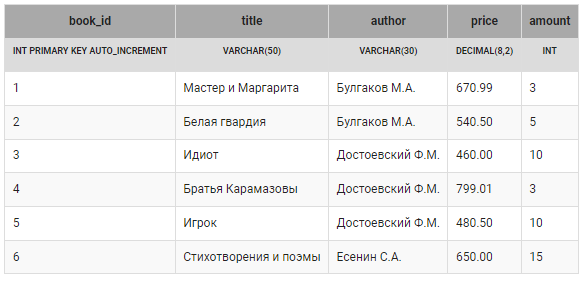

### 22 Вложенный запрос, возвращающий одно значение

Вывести информацию (автора, название и цену) о  книгах, цены которых меньше или равны средней цене книг на складе. Информацию вывести в отсортированном по убыванию цены виде. Среднее вычислить как среднее по цене книги.

In [ ]:
SELECT author, 
       title, 
       price
  FROM book
 WHERE price <= (SELECT AVG(price)
                   FROM book
                )
 ORDER BY price DESC

### 23 Использование вложенного запроса в выражении

Вывести информацию (автора, название и цену) о тех книгах, цены которых превышают минимальную цену книги на складе не более чем на 150 рублей в отсортированном по возрастанию цены виде.

In [ ]:
SELECT author, 
       title, 
       price
  FROM book
 WHERE price - (SELECT MIN(price) 
                FROM book) <= 150
 ORDER BY price ASC;

### 24 Вложенный запрос, оператор IN

Вывести информацию (автора, книгу и количество) о тех книгах, количество экземпляров которых в таблице `book` не дублируется.

In [ ]:
SELECT author, 
       title,  
       amount
  FROM book
 WHERE amount IN(SELECT amount
                   FROM book
                  GROUP BY amount
                 HAVING COUNT(amount)=1
                )

### 25 Вложенный запрос, операторы ANY и ALL

Вывести информацию о книгах(автор, название, цена), цена которых меньше самой большой из минимальных цен, вычисленных для каждого автора.

In [ ]:
SELECT author, 
       title, 
       price
  FROM book
 WHERE price < ANY(SELECT MIN(price)
                     FROM book
                    GROUP BY author
                  )

### 26 Вложенный запрос после SELECT

Посчитать сколько и каких экземпляров книг нужно заказать поставщикам, чтобы на складе стало одинаковое количество экземпляров каждой книги, равное значению самого большего количества экземпляров одной книги на складе. Вывести название книги, ее автора, текущее количество экземпляров на складе и количество заказываемых экземпляров книг. Последнему столбцу присвоить имя Заказ. В результат не включать книги, которые заказывать не нужно.

In [ ]:
SELECT title, 
       author, 
       amount, 
       (SELECT MAX(amount) FROM book) - amount AS Заказ
  FROM book
HAVING Заказ > 0

### 27

При продаже всех книг, какая книга принесет больше всего выручки. Ответ выведите в процентах.

In [ ]:
SELECT author, 
       price, 
       amount, 
       ROUND(100*(price*amount) / (SELECT SUM(price*amount) FROM book),2) AS percent
  FROM book
 ORDER BY percent DESC